# Olivia O'Mahoney
# Project 1
Question: Look at the records of just the Computing Majors only as one group. Computing Majors include: Computer Science, IT, Game Dev, Digital Media Technology, Technical Studies, Information Security, Data Analytics and Web Development.
What were the main sources from which they received information about CCM’s computing programs?

In [15]:
import zipfile
import os
import pandas as pd

## Read in the csv files
data22 = pd.read_csv('/Users/oliviaomahoney/Documents/School/Majors Survey Results/Majors Survey Results - Fall 2022.csv')

In [21]:
# Majors Survey Results - Fall 2022.csv
data22.shape 
data22.columns
data22.dtypes
data22.describe()
data22.head()
data22.tail()
data22.sample(9)
data22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 92 columns):
 #   Column                                                                                                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                           --------------  -----  
 0   Timestamp                                                                                                                                                                                                                                                        218 non-null    object 
 1   Which course are you enrolled in

In [45]:
## Select the columns wanted to answer my questions
columns_to_keep = ["What degree program are you currently enrolled in?",
                   "Did you receive information about the CCM computing programs from any of the following sources? [High school guidance counselor]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [High School Teacher]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [CCM Information Technologies Website]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [CCM Admissions]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [CCM advisor/counselor]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [Employer]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [CCM Workforce Development]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [NJ Workforce Development Program]",
                   "Did you receive information about the CCM computing programs from any of the following sources? [Other]",
                   "Gender",
                   "Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?",
                   "On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Titans Tuesday (Virtual) Information Session]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [HS Sharetime Information Session]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Challenger Program]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [CyberSecurity Information Protection Program Participation ]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Information Session at my high school]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit with my high school]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit (individual)]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Workforce Development class]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Corporate Training]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Teen Arts Festival]",
                   "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Summer camp at CCM]"]
data22_columns = data22[columns_to_keep]
#Simplify the names of the columns for better readability
data22_columns = data22[columns_to_keep].copy()
simplified_names = {
    "What degree program are you currently enrolled in?": "Degree Program",
    "Did you receive information about the CCM computing programs from any of the following sources? [High school guidance counselor]": "Info from HS Counselor",
    "Did you receive information about the CCM computing programs from any of the following sources? [High School Teacher]": "Info from HS Teacher",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM Information Technologies Website]": "Info from IT Website",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM Admissions]": "Info from Admissions",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM advisor/counselor]": "Info from Advisor",
    "Did you receive information about the CCM computing programs from any of the following sources? [Employer]": "Info from Employer",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM Workforce Development]": "Info from Workforce Development",
    "Did you receive information about the CCM computing programs from any of the following sources? [NJ Workforce Development Program]": "Info from NJ Workforce Program",
    "Did you receive information about the CCM computing programs from any of the following sources? [Other]": "Info from Other",
    "Gender": "Gender",
    "Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?": "Why Interested in Computing",
    "On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?": "Interest in More Classes",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]": "Open House",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]": "Instant Decision Day",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]": "On-Campus Info Session",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Titans Tuesday (Virtual) Information Session]": "Titans Tuesday",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]": "Women Who Dare",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]": "Regional College Fair",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [HS Sharetime Information Session]": "HS Sharetime Info Session",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Challenger Program]": "Challenger Program",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [CyberSecurity Information Protection Program Participation ]": "CyberSecurity Program",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Information Session at my high school]": "HS Info Session",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit with my high school]": "HS Campus Visit",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Campus Visit (individual)]": "Individual Campus Visit",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Workforce Development class]": "Workforce Development Class",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Corporate Training]": "Corporate Training",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Teen Arts Festival]": "Teen Arts Festival",
    "Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Summer camp at CCM]": "Summer Camp"
}
data22_columns.rename(columns=simplified_names, inplace=True)

In [47]:
print("Data 2022")
data22_clean.head(9)

Data 2022


,Degree Program,Info from HS Counselor,Info from HS Teacher,Info from IT Website,Info from Admissions,Info from Advisor,Info from Employer,Info from Workforce Development,Info from NJ Workforce Program,Info from Other,...,HS Sharetime Info Session,Challenger Program,CyberSecurity Program,HS Info Session,HS Campus Visit,Individual Campus Visit,Workforce Development Class,Corporate Training,Teen Arts Festival,Summer Camp
0,Computer Science,Yes,Yes,Yes,Yes,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,No,No
1,Computer Science,No,No,Yes,No,Yes,No,No,No,No,...,No,No,No,No,No,No,Yes,No,No,No
2,Liberal Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,No,Yes,No,No,No,No,No,No
3,Computer Science,Yes,Yes,No,Yes,No,No,No,No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
4,Information Technology,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
5,Computer Science,Yes,Yes,Yes,Yes,Yes,No,No,No,No,...,No,No,No,Yes,Yes,No,No,No,No,No
6,Information Technology,No,No,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
7,Academy Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,No,No,Yes,No,Yes,No,No,No,No
8,Computer Science,No,No,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [57]:
# Save the cleaned and renamed DataFrame to a CSV file
data22_columns.to_csv('cleaned_data.csv', index=False)

# The file will be saved in your current working directory
print("File saved as 'cleaned_data.csv' in the working directory.")

File saved as 'cleaned_data.csv' in the working directory.


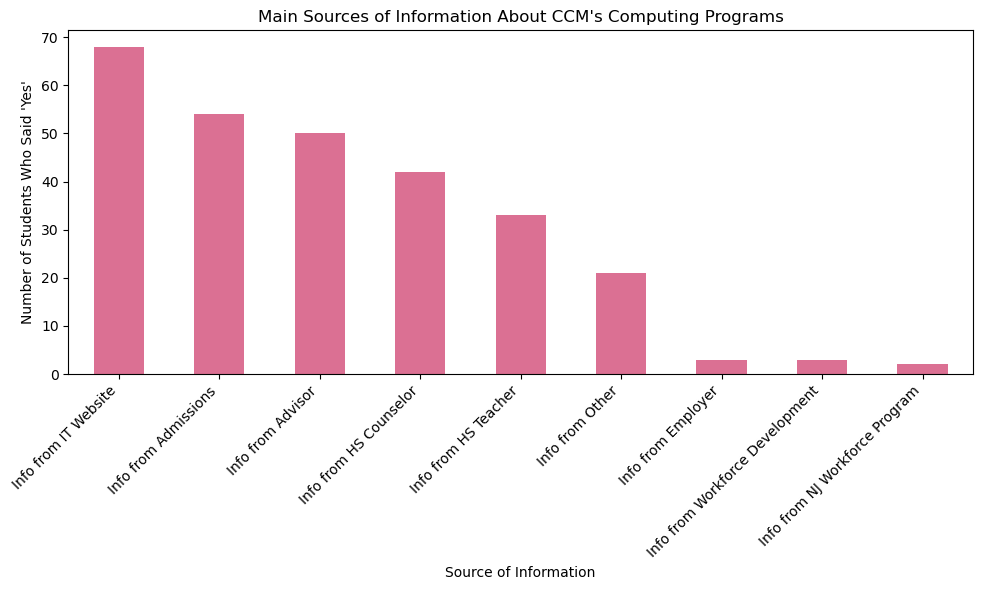

In [193]:
## Question 1: What were the main sources from which they received information about CCM’s computing programs?
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame named data22_columns

# Select the relevant columns for the main sources of information
source_columns = [
    "Info from HS Counselor",
    "Info from HS Teacher",
    "Info from IT Website",
    "Info from Admissions",
    "Info from Advisor",
    "Info from Employer",
    "Info from Workforce Development",
    "Info from NJ Workforce Program",
    "Info from Other"
]

# Count the number of "Yes" responses for each source of information
sources_of_info = data22_columns[source_columns].apply(lambda x: x == 'Yes').sum()

# Sort the results to see the most common sources
sources_of_info = sources_of_info.sort_values(ascending=False)

# Plot the results in a bar graph
plt.figure(figsize=(10, 6))
sources_of_info.plot(kind='bar', color='palevioletred')

# Add titles and labels
plt.title("Main Sources of Information About CCM's Computing Programs")
plt.xlabel("Source of Information")
plt.ylabel("Number of Students Who Said 'Yes'")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Display the graph
plt.tight_layout()
plt.show()

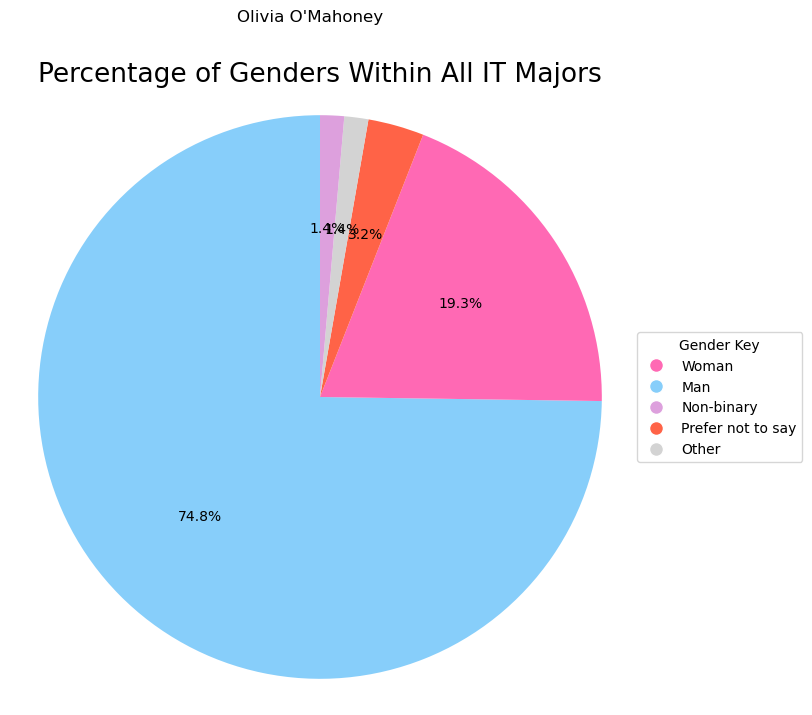

In [189]:
## Question 2: What is the percentage of each gender in each major?
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame named data22_columns

# Remove any rows where the 'Gender' column is empty
data_cleaned = data22_columns['Gender'].dropna()

# Define the colors for each gender
gender_colors = {
    'Woman': 'hotpink',
    'Man': 'lightskyblue',
    'Non-binary': 'plum',
    'Prefer not to say': 'tomato',
    'Other': 'lightgrey'
}

# Group by 'Gender' and count the occurrences
total_gender_counts = data_cleaned.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_gender_counts, 
        labels=None,  # Set labels to None to remove extra labels
        autopct='%1.1f%%', 
        startangle=90, 
        colors=[gender_colors.get(gender, 'lightgrey') for gender in total_gender_counts.index])

# Add titles
plt.title("Percentage of Genders Within All IT Majors", size = 19)
plt.suptitle("Olivia O'Mahoney")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Move the legend more to the right
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=gender, 
                                 markerfacecolor=color, markersize=10) 
                    for gender, color in gender_colors.items()],
             title="Gender Key", loc="center left", bbox_to_anchor=(1, 0.5))

# Display the results as a pie chart
plt.show()


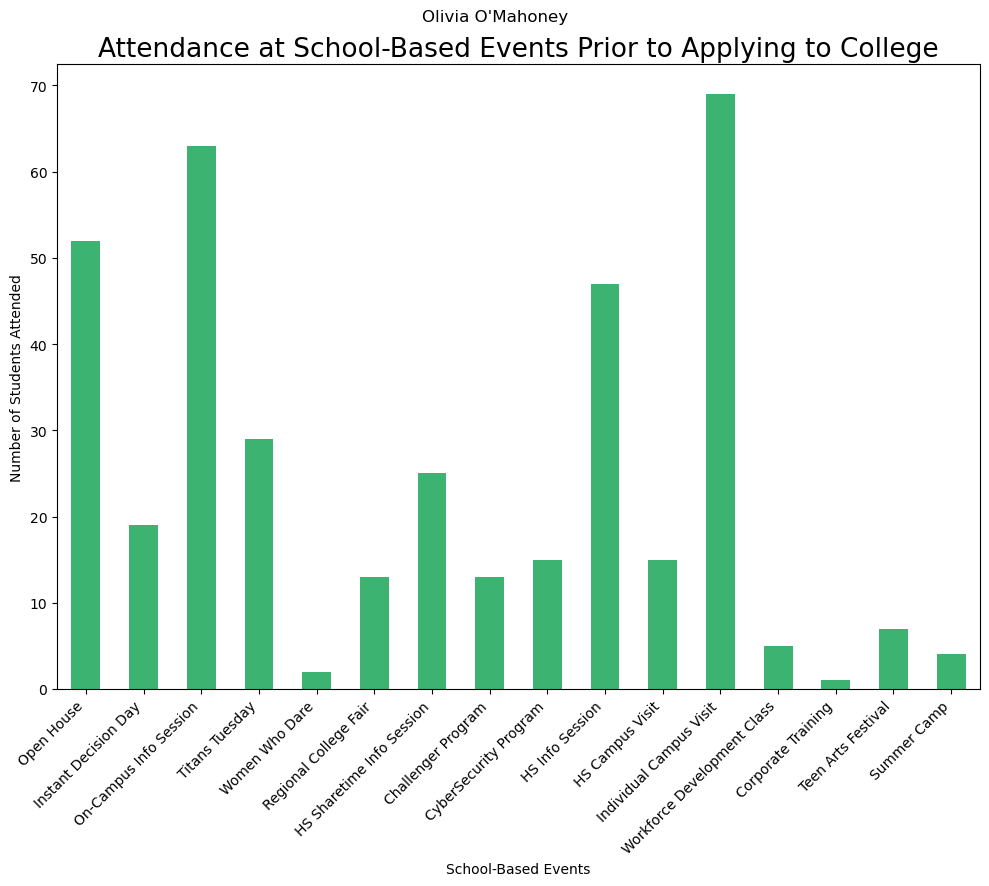

In [187]:
## Question 3: How many of the current students attended a school-based event prior to applying to college? Which one was the most attended? Which one was the least attended?
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame named data22_columns

# Define a list of the relevant school-based event columns
event_columns = [
    "Open House",
    "Instant Decision Day",
    "On-Campus Info Session",
    "Titans Tuesday",
    "Women Who Dare",
    "Regional College Fair",
    "HS Sharetime Info Session",
    "Challenger Program",
    "CyberSecurity Program",
    "HS Info Session",
    "HS Campus Visit",
    "Individual Campus Visit",
    "Workforce Development Class",
    "Corporate Training",
    "Teen Arts Festival",
    "Summer Camp"
]

# Count the number of 'Yes' responses for each event
attendance_counts = data22_columns[event_columns].apply(lambda x: x.str.contains("Yes", na=False)).sum()

# Create the bar graph
plt.figure(figsize=(10, 9))
attendance_counts.plot(kind='bar', color='mediumseagreen')

# Add titles, suptitles, and labels
plt.title("Attendance at School-Based Events Prior to Applying to College", size = 19) # Title explaining contents of the graph
plt.suptitle("Olivia O'Mahoney") # My name
plt.xlabel("School-Based Events") # x-label
plt.ylabel("Number of Students Attended") # y-label
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Display the bar graph
plt.tight_layout()  # Adjust layout
plt.show()

# Question 4: 
## What insights can be drawn from the Course Survey data to help increase the number of students taking computing classes?
Insights that I can draw from the Course Survey is regarding the events that current students had been to prior to applying to college. Data can be taken from this dataset to show the event coordinators which events do better. They can either use that information to between the attended sessions or create even more advertisement for already highly attended sessions to gain more IT students. Another conclusion that could be drawn is in regards to gender within the IT student population. Most of the IT department is men and if the IT department would like to diversify gender more to create better equality, they should focus on appealing to the gender minority. 